In [1]:
# https://stackoverflow.com/questions/57696572/how-can-i-visual-a-dense-graph-obviously-in-networkx-python-package
# https://stackoverflow.com/a/9406398
# https://stackoverflow.com/a/17388676

In [2]:
import networkx as nx
import analysis as a
import os
from pathlib import Path
import matplotlib.pyplot as plt

DATAPATH = os.path.join("..", "data", "from_darby", "MSCallGraph_0.csv")
RESULTFOLDER = os.path.join("..", "results", "project_update_1")
Path(RESULTFOLDER).mkdir(parents = True, exist_ok = True)

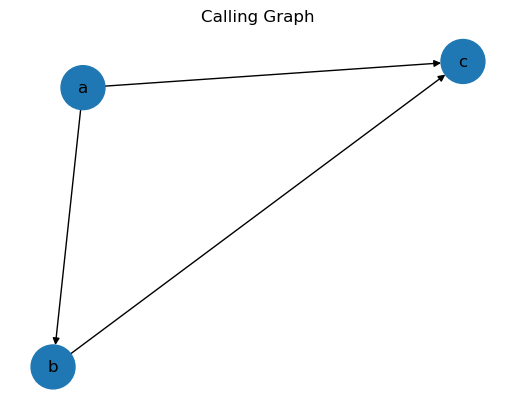

In [3]:
small_calling_nxg = nx.DiGraph()
small_calling_nxg.add_edge('a', 'b')
small_calling_nxg.add_edge('a', 'c')
small_calling_nxg.add_edge('b', 'c')
plt.figure()
plt.title("Calling Graph")
nx.draw(small_calling_nxg, with_labels=True, node_size=[1000]*3)
plt.savefig(os.path.join(RESULTFOLDER, "small_calling_graph.png"))

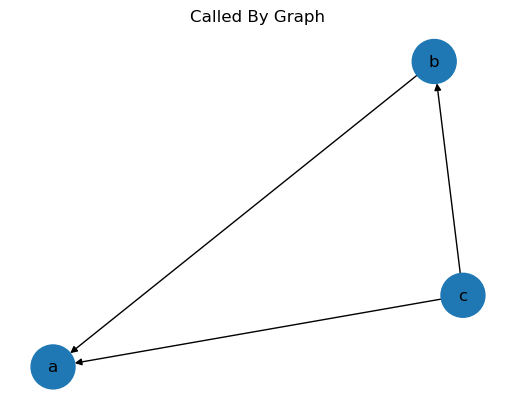

In [4]:
small_called_by_nxg = nx.DiGraph()
small_called_by_nxg.add_edge('c', 'a')
small_called_by_nxg.add_edge('c', 'b')
small_called_by_nxg.add_edge('b', 'a')
plt.figure()
plt.title("Called By Graph")
nx.draw(small_called_by_nxg, with_labels=True, node_size=[1000]*3)
plt.savefig(os.path.join(RESULTFOLDER, "small_called_by_graph.png"))

In [5]:
g = a.Graphs(DATAPATH)

In [6]:
len(g.microservices)

7386

In [7]:
sum(len(v) for v in g.called_by.values())

16188

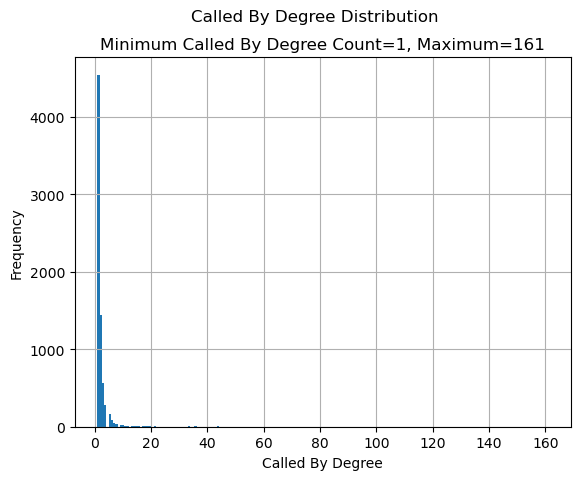

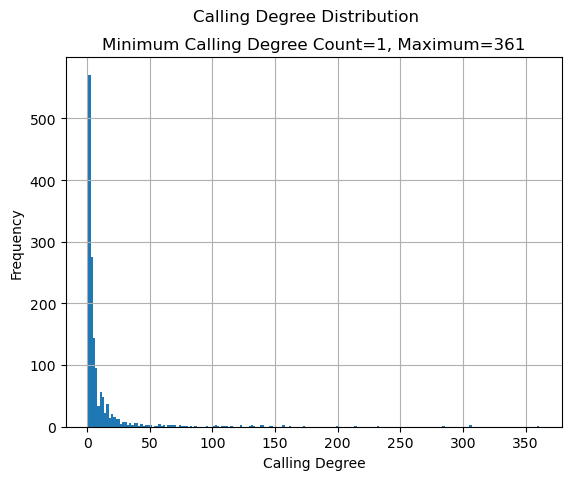

In [8]:
a.plot_histogram(g, ["Called By Degree", "Calling Degree"], [os.path.join(RESULTFOLDER, "true_called_by.png"), os.path.join(RESULTFOLDER, "true_calling.png")], 200)

In [9]:
a.calculate_sparsity_ratio(g, os.path.join(RESULTFOLDER, "true_sparsity_ratio.txt"))

In [10]:
a.calculate_called_by1(g, os.path.join(RESULTFOLDER, "true_called_by1.txt"))

4543 microservices are called by only 1 other microservice.


In [11]:
a.calculate_connected_components(g, os.path.join(RESULTFOLDER, "true_connected_components.txt"))

In [12]:
# true_nxg = nx.DiGraph()
# node_sizes = list()
# for i, _ in enumerate(g.microservices):
#     true_nxg.add_node(i)
#     node_sizes.append(len(g.called_by_iz[i]) if i in g.called_by_iz else 0)
# for k, v in g.called_by_iz.items():
#     for e in v:
#         true_nxg.add_edge(k, e)
# plt.figure()
# plt.title("Called By Graph Degree-Sized Nodes")
# nx.draw(true_nxg, node_size=node_sizes)
# plt.savefig(os.path.join(RESULTFOLDER, "true_bysize_graph.png"))

In [13]:
# true_nxg = nx.DiGraph()
# for k, v in g.called_by_iz.items():
#     for e in v:
#         true_nxg.add_edge(k, e)
# pos = nx.nx_agraph.graphviz_layout(true_nxg, prog="twopi", args="")
# plt.figure()
# nx.draw(true_nxg, pos, node_size=20, alpha=0.5, node_color="blue", with_labels=False)
# plt.axis("equal")
# plt.savefig(os.path.join(RESULTFOLDER, "true_deathstar_graph.png"))